In [1]:
%config Completer.use_jedi = False

## Simulation of a Noddy history and visualisation of output

In [2]:
import sys, os
import subprocess
from sandbox import _test_data, _package_dir

import pynoddy
import pynoddy.output
import pynoddy.history


### Compute the model

The simplest way to perform the Noddy simulation through Python is simply to call the executable. One way that should be fairly platform independent is to use Python's own subprocess module:

In [3]:
# Folder for the Pynoddy package
repository_folder = os.path.abspath(_package_dir + '/../../pynoddy/') + os.sep

# Folder containing the examples
example_directory = os.path.abspath(repository_folder + 'examples/') + os.sep


In [4]:
# Choose a history file
history_file = 'simple_two_faults.his'  # Modify here

history = os.path.abspath(example_directory + history_file)

In [5]:
# Choose an output folder
output_folder = _test_data["pynoddy_data"] 

output = os.path.abspath(output_folder+'noddy_out')

In [6]:
# Name for executing noddy "noddy" or "noddy.exe"
noddy_exec = 'noddy.exe'

In [7]:
# NOTE: Make sure that the noddy executable is accessible in the system!!
print(subprocess.Popen(['noddy.exe', history, output, 'BLOCK'], 
                       shell=False, stderr=subprocess.PIPE, 
                       stdout=subprocess.PIPE).stdout.read())

b''


In [8]:
pynoddy.compute_model(history, output, noddy_path=noddy_exec)

''

### Loading Noddy output files

In [9]:
N1 = pynoddy.output.NoddyOutput(output)

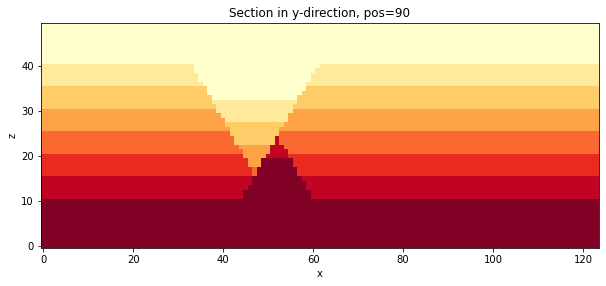

In [12]:
N1.plot_section('y', position=90, figsize = (10,5))

### Load the sandbox

In [13]:
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [14]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

sandbox.sensor.sensor_api: INFO | JSON configuration loaded for sensor.
sandbox.sensor.dummy: INFO | DummySensor initialized.


In [15]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector, use_panel=True)

sandbox.projector.projector: INFO | JSON configuration loaded for projector


Launching server at http://localhost:40115
sandbox.projector.projector: INFO | Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


In [16]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

sandbox.markers.aruco: INFO | Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
sandbox.markers.aruco: INFO | using dummy aruco module
sandbox.markers.aruco: INFO | Aruco module loaded
sandbox.markers.markers_plotting: INFO | Aruco detection ready


In [17]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco= aruco if 'aruco' in globals() else None)


sandbox.projector.contourlines: INFO | ContourLinesModule loaded successfully
sandbox.projector.shading: INFO | LightSource set to address RWTH Aachen, Germany at datetime Wed Mar 31 12:47:32 2021
sandbox.projector.cmap: INFO | CmapModule loaded successfully


In [18]:
import numpy as np
frame = np.load(_test_data["topo"] + 'DEM1.npz')["arr_0"]
frame += np.abs(np.min(frame))
main.load_frame(frame=frame)

sandbox.main_thread: INFO | loaded


True

In [ ]:
main.load_frame(frame=None)

In [19]:
# Start the thread 
main.run()

sandbox.main_thread: INFO | Thread started or resumed...


In [20]:
main.widget_plot_module()

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] Checkbox(name='Show relief shading', value=True)
                        [2] Tabs
                            [0] WidgetBox
                                [0] Checkbox(name='Manual configuration')
                                [1] FloatSlider(end=360.0, name='Azimuth', value=202.81605836210923, value_throttled=202.81605836210923)
                                [2] FloatSlider(end=90.0, name='Altitude', value=41.47143697871155, value_throttled=41.47143697871155)
                                [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
                            [1] WidgetBox
                                [0] TextInput(name='Enter address (e.g. City,..., value='RWTH Aachen, Germany')
                                [1] DatePicker(name='Select date (UTC +0)', value=datetime.date(2021, ...)
                                [2] Row(width_policy='min')
                                    [0] IntSlider(end=23, name='Hour', value=12, value_throttled=12, width_policy='min')
                                    [1] IntSlider(end=59, name='Minute', value=47, value_throttled=47, width_policy='min')
                                    [2] IntSlider(end=59, name='Second', value=32, value_throttled=32, width_policy='min')
                                [3] Markdown(str, sizing_mode='scale_width')
                                [4] Markdown(str, sizing_mode='scale_width')
                                [5] Markdown(str, sizing_mode='scale_width')
                                [6] Markdown(str, sizing_mode='scale_width')
                            [2] WidgetBox
                                [0] Checkbox(name='Start day simulation i...)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15, value_throttled=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
         

### Loading Noddy to the sandbox

In [21]:
from sandbox.modules.pynoddy import PynoddyModule

In [22]:
noddy = PynoddyModule(output_model=N1, extent=sensor.extent, box=sensor.physical_dimensions)

sandbox.modules.pynoddy.pynoddy_module: INFO | Model extent: [0, 12400, 0, 9400, 0, 5000]
sandbox.modules.pynoddy.pynoddy_module: INFO | Model resolution: [124, 94, 50]
sandbox.modules.pynoddy.pynoddy_module: INFO | Size of each block: [100, 100, 100]
sandbox.modules.gempy.utils: INFO | scale in Model units/ mm (X,Y,Z): [12.4, 11.75, 15.625]
sandbox.modules.gempy.utils: INFO | the shown extent is [0.0, 12400.0, 0.0, 9400.0] 
sandbox.modules.pynoddy.pynoddy_module: INFO | PynoddyModule loaded successfully


### Add the module to the main thread

In [23]:
main.add_module(name ='Pynoddy', module=noddy)

sandbox.main_thread: INFO | module Pynoddy added to modules


In [24]:
main.stop()

sandbox.main_thread: INFO | Thread stopped.


### Add Noddy to main Thread

In [ ]:
scale_frame = noddy.scale_frame_to_model(main.sb_params.get("frame"))
_ = noddy.grid.update_grid(scale_frame)

empty2d = np.zeros((noddy.model_resolution[0], noddy.model_resolution[1], 3))
for i in range(3):
    empty2d[:, :, i] = noddy.grid.depth_grid[:, i].reshape(noddy.model_resolution[:2])
topo_level = empty2d[..., 2, np.newaxis]

noddy.create_topography_mask(topo_level)
noddy.set_block_solution_to_topography()

In [ ]:
noddy.vertices_mapview

In [ ]:
noddy.set_block_solution_to_topography()

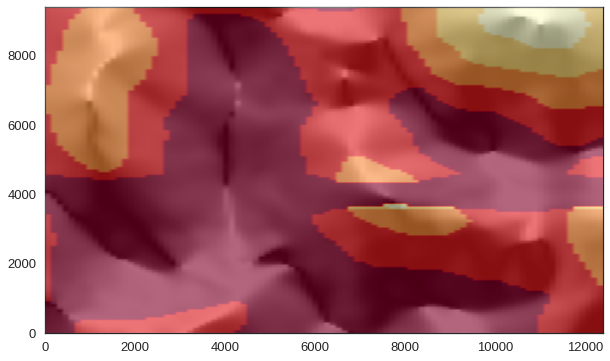

In [25]:
noddy.plot_mapview()

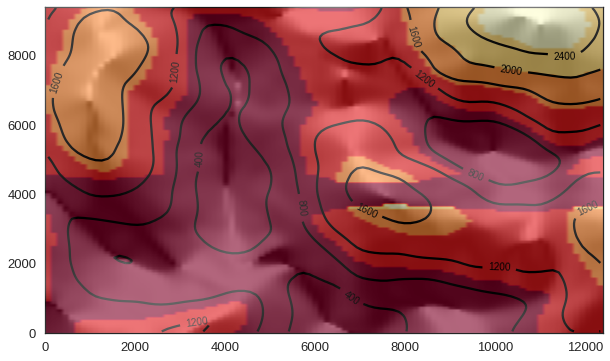

In [29]:
noddy.plot_mapview(show_contour=True)

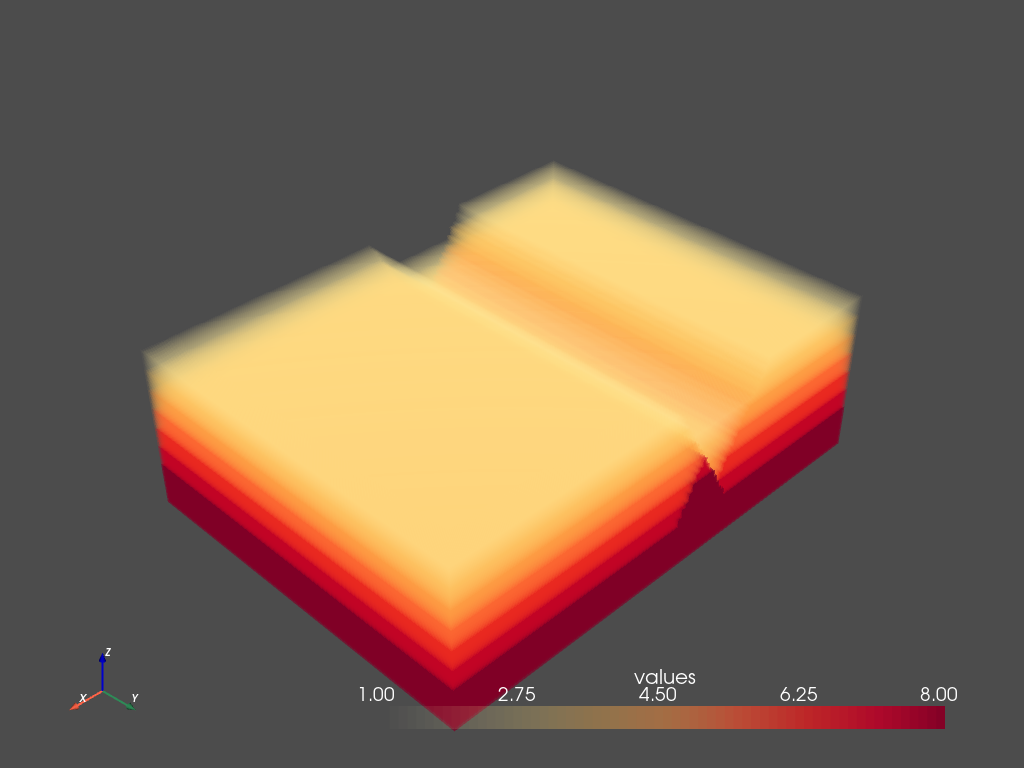

In [35]:
import matplotlib.pyplot as plt
noddy.plot_3D(topography=False, cmap="YlOrRd")

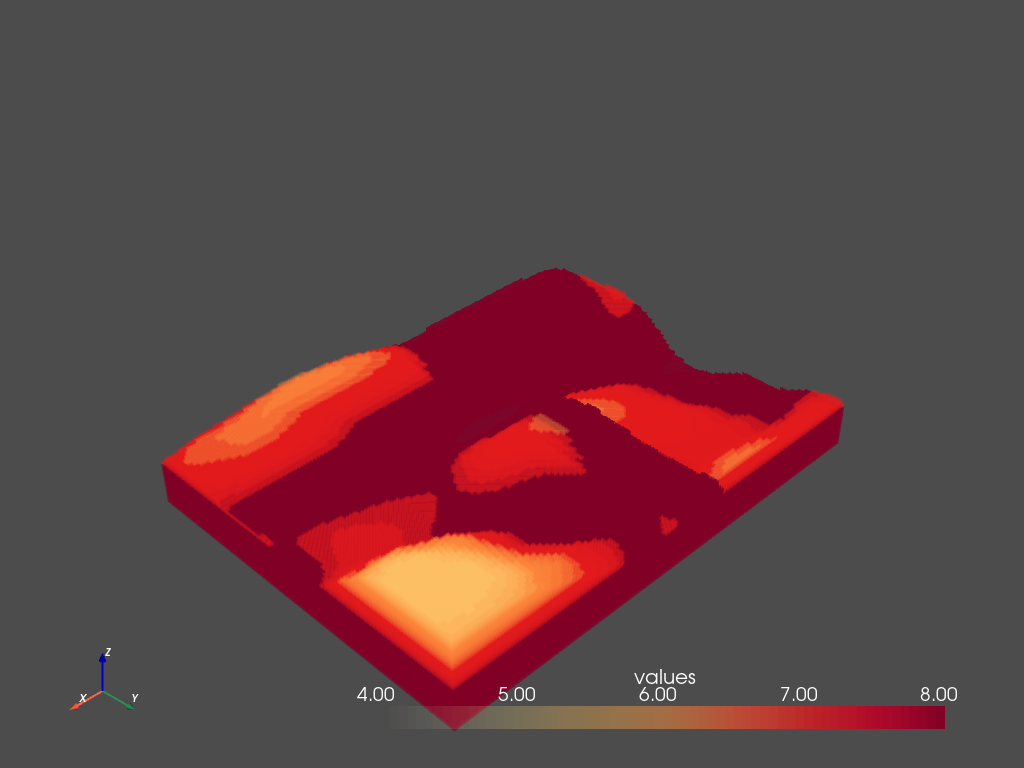

In [36]:
noddy.plot_3D(topography=True, cmap="YlOrRd")

<AxesSubplot:title={'center':'Section in y-direction, pos=90'}, xlabel='x', ylabel='z'>

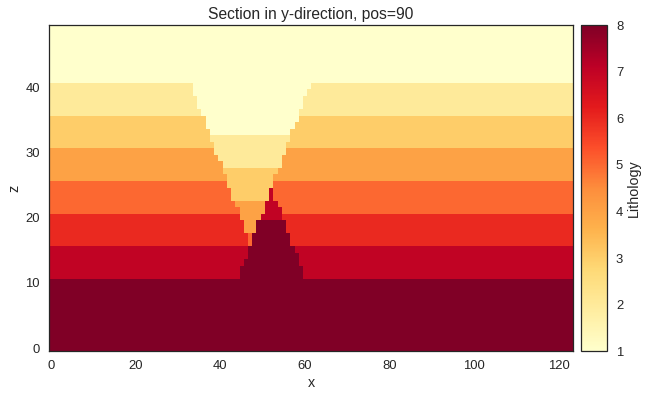

In [38]:
noddy.plot_section(direction='y', 
                   position=90,
                   topography=False,
                   colorbar=True,)

In [ ]:
noddy.plot_section(direction='x', 
                   position=120,
                   topography=True,
                   colorbar=True,)

In [ ]:
noddy.grid.depth_grid

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
im = ax.contourf(values)
fig.colorbar(im, ax=ax)

In [ ]:
import skimage.measure

In [ ]:
vertices, simplices, normals, values = skimage.measure.marching_cubes(noddy.block_model*noddy.mask, 6)#, mask = noddy.mask)

In [ ]:
noddy._values_ix

In [ ]:
for val in noddy.grid.depth_grid[:,2]:
    np.where(noddy._values_ix[:,0] == val)

In [ ]:
np.where(noddy._values_ix[:,0] == val)

In [ ]:
noddy.block_model*noddy.mask

In [ ]:
np.where(noddy._values_ix[:,0] == noddy.grid.depth_grid[:,0])

In [ ]:
noddy._values_ix[:,0].shape == noddy.grid.depth_grid[:,0].shape

In [ ]:
noddy.grid.depth_grid[:,0]

In [ ]:
noddy.grid.depth_grid[:,:2]

In [ ]:
block = noddy.block_model.copy()

for i in noddy.grid.depth_grid:
    print(i)

In [ ]:
block.shape

In [ ]:
vertices, simplices, normals, values = skimage.measure.marching_cubes(noddy.block_model, 5, mask = noddy.mask)

In [ ]:
import pyvista
pyvista.plot(vertices, notebook=False)

In [ ]:
values

In [ ]:
cop = noddy.block_model.copy()
mask = np.where(cop*noddy.mask==0)
cop[mask] = -1

In [ ]:
np.unravel_index(np.argmin(cop, axis=None), cop.shape)

In [ ]:
height, width, depth = cop.shape
vertices = []
for i in range(height):
    for j in range(width):
        pos = np.argmin(cop[i, j, :])
        vertices.append([i,j,noddy.block_model[i,j,pos]])
        #cop[i,j, pos] = -10
vertices = np.asarray(vertices)       
#cop[np.where(cop==-1)] = np.nan

In [ ]:
cop.shape

In [ ]:
import pyvista
pyvista.plot(cop)

In [ ]:
vertices, simplices, normals, values = skimage.measure.marching_cubes(cop, -10)

In [ ]:
pyvista.plot(vertices)

In [ ]:
img = skimage.transform.resize(
                vertices[:,2].reshape(noddy.model_resolution[:2]),
                (1600, 1600),
                order=3,
                mode='edge',
                anti_aliasing=True, preserve_range=False)

In [ ]:
img = vertices[:,2].reshape(noddy.model_resolution[:2])

In [ ]:
plt.imshow(img, origin="lower", interpolation='spline16')
plt.colorbar()

In [ ]:
'antialiased', 'nearest', 'bilinear',
    'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite',
    'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell',
    'sinc', 'lanczos'.

In [ ]:
plt.contourf(img, extent = noddy.model_extent[:4])
plt.contour(frame, extent = noddy.model_extent[:4])

In [ ]:
plt.contourf(img, extent = noddy.model_extent[:4])
plt.contour(frame, extent = noddy.model_extent[:4])

In [ ]:
noddy.block_model[0,0,10]

In [ ]:
vertices[0]

In [ ]:
cop

In [47]:
N1.extent_x

12400.0